# Multi-Layer Fully Connected 

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
  

In [ ]:
# device config
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Hyper parameters
input_size=784  #28x28
hidden_size=100
num_classes=10
num_epochs=2
batch_size=100
learning_rate=0.01

# MNSIT
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)

test_dataset=torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),)

In [ ]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [ ]:
examples=iter(train_loader)
samples,labels=examples.next()
print(samples.shape,labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


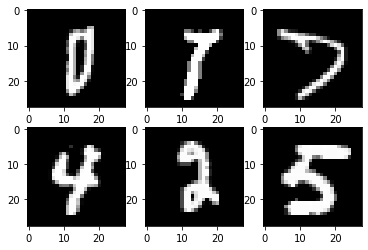

In [ ]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap='gray')
plt.show()

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)
    return out
    
model=NeuralNet(input_size,hidden_size,num_classes)

In [ ]:
# loss and optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

# training loop
n_total_steps=len(train_loader)

for epoch in range(num_epochs):

  for i,(images,labels) in enumerate(train_loader):
    # 100,1,28,28
    #100,784
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)

    # Forward
    outputs=model(images)
    loss=criterion(outputs,labels)



    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%100==0:
      print(f'{epoch+1}/{num_epochs},step{i+1}/{n_total_steps},loss={loss.item()}:,4f')

# test
with torch.no_grad():
  n_correct=0
  n_samples=0
  for images, labels in test_loader:
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    outputs=model(images)
    # Value,index
    _,predictions=torch.max(outputs,1)
    n_samples+=labels.shape[0]
    n_correct+=(predictions==labels).sum().item()
  acc=100*n_correct/n_samples
  print(f'accuracy={acc}')


1/2,step100/600,loss=0.2457723468542099:,4f
1/2,step200/600,loss=0.23523223400115967:,4f
1/2,step300/600,loss=0.10166707634925842:,4f
1/2,step400/600,loss=0.0961991474032402:,4f
1/2,step500/600,loss=0.3613779842853546:,4f
1/2,step600/600,loss=0.059760794043540955:,4f
2/2,step100/600,loss=0.0952649787068367:,4f
2/2,step200/600,loss=0.03883001580834389:,4f
2/2,step300/600,loss=0.1914907693862915:,4f
2/2,step400/600,loss=0.13038566708564758:,4f
2/2,step500/600,loss=0.2698437571525574:,4f
2/2,step600/600,loss=0.08824767917394638:,4f
accuracy=96.39
